
# NLP BIBLE

In [100]:
#imports

import numpy as np
import spacy
import asent
from spacytextblob.spacytextblob import SpacyTextBlob
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import os
import nltk
from wordcloud import WordCloud, STOPWORDS

In [101]:
# reading American Standard bible csv's to dataframes for NLP processing 

asv_df = pd.read_csv("Resources/asv.csv")
asv_df['Combined'] = asv_df['Book Number'].astype(str) + " " + asv_df['Chapter'].astype(str) + ":" + asv_df['Verse'].astype(str)
asv_df.drop(['Chapter','Verse','Book Number'],axis=1, inplace=True)
asv_df = asv_df[["Verse ID","Book Name","Combined","Text"]]
asv_df.set_index("Verse ID",inplace=True)
asv_df.head(1)

,Book Name,Combined,Text
Verse ID,,,
1,Genesis,1 1:1,In the beginning God created the heavens and t...


In [102]:
# reading Qyran csv's to dataframes for NLP processing 


enq_df = pd.read_csv("Resources/enq.csv")
#enq_df["Verse Number"] = list(range(6236))
#enq_df.head(2)


In [103]:
# Reading King James bible csv's to dataframes for NLP processing 

kjv_df = pd.read_csv("Resources/kjv.csv", index_col="Verse ID")
kjv_df['Combined'] = kjv_df['Book Number'].astype(str) + " " + kjv_df['Chapter'].astype(str) + ":" + kjv_df['Verse'].astype(str)
kjv_df.drop(['Chapter','Verse','Book Number'],axis=1, inplace=True)
kjv_df = kjv_df[["Book Name","Combined", "Text"]]
kjv_df.head(1)

,Book Name,Combined,Text
Verse ID,,,
1,Genesis,1 1:1,In the beginning God created the heaven and t...


In [104]:
# Reading World English bible csv's to dataframes for NLP processing 

web_df = pd.read_csv("Resources/web.csv", index_col="Verse ID")
web_df['Combined'] = web_df['Book Number'].astype(str) + " " + web_df['Chapter'].astype(str) + ":" + web_df['Verse'].astype(str)
web_df.drop(['Chapter','Verse','Book Number'],axis=1, inplace=True)
web_df = web_df[["Book Name","Combined", "Text"]]
web_df.head(1)

,Book Name,Combined,Text
Verse ID,,,
1,Genesis,1 1:1,In the beginning God created the heavens and t...


In [105]:
# Choosing the correct library to analyze the text data. I chose the small library for github transfer size issues

spacy_model = 'en_core_web_sm'

In [123]:
# Adding spacy model and the sentencizer and asent/textblob pipelines

nlp = spacy.load(spacy_model)
nlp.add_pipe('sentencizer')
nlp.add_pipe('asent_en_v1')
nlp.add_pipe('spacytextblob')


In [107]:
# Doing the analysis and adding the values computed (polarity) for the two pipelines into their respective colums

verse_sentiments_asv = list(nlp.pipe(asv_df.Text.astype(str)))
asv_df["sentiment_asent"] = [verse_nlp._.polarity.compound for verse_nlp in verse_sentiments_asv]
asv_df['sentiment_textblob'] = [verse_nlp._.blob.polarity for verse_nlp in verse_sentiments_asv]
asv_df['average_sentiment'] = asv_df[["sentiment_asent", "sentiment_textblob"]].mean(axis=1)

In [108]:
# Doing the same steps but for the King James version

verse_sentiments_kjv = list(nlp.pipe(kjv_df.Text.astype(str)))
kjv_df["sentiment_asent"] = [verse_nlp._.polarity.compound for verse_nlp in verse_sentiments_kjv]
kjv_df['sentiment_textblob'] = [verse_nlp._.blob.polarity for verse_nlp in verse_sentiments_kjv]
kjv_df['average_sentiment'] = kjv_df[["sentiment_asent", "sentiment_textblob"]].mean(axis=1)

In [109]:
# same as above

verse_sentiments_web = list(nlp.pipe(web_df.Text.astype(str)))
web_df["sentiment_asent"] = [verse_nlp._.polarity.compound for verse_nlp in verse_sentiments_web]
web_df['sentiment_textblob'] = [verse_nlp._.blob.polarity for verse_nlp in verse_sentiments_web]
web_df['average_sentiment'] = web_df[["sentiment_asent", "sentiment_textblob"]].mean(axis=1)

In [110]:
#same steps taken for the Quran as the 3 different bible versions.

verse_sentiments_enq = list(nlp.pipe(enq_df.EnglishTranslation.astype(str)))
enq_df["sentiment_asent"] = [verse_nlp._.polarity.compound for verse_nlp in verse_sentiments_enq]
enq_df['sentiment_textblob'] = [verse_nlp._.blob.polarity for verse_nlp in verse_sentiments_enq]
enq_df['average_sentiment'] = enq_df[["sentiment_asent", "sentiment_textblob"]].mean(axis=1)

In [111]:
enq_df


,JuzNo,EnglishTranslation,sentiment_asent,sentiment_textblob,average_sentiment
0,1,"In the name of Allah, Most Gracious, Most Merc...",0.598445,0.5,0.549222
1,1,"Praise be to Allah, the Cherisher and Sustaine...",0.778253,0.0,0.389127
2,1,"Most Gracious, Most Merciful;",0.557370,0.5,0.528685
3,1,Master of the Day of Judgment.,0.000000,0.0,0.000000
4,1,"Thee do we worship, and Thine aid we seek.",0.295958,0.0,0.147979
...,...,...,...,...,...
6231,30,"The King (or Ruler) of Mankind,",0.000000,0.0,0.000000
6232,30,"The god (or judge) of Mankind,-",0.273213,0.0,0.136606
6233,30,"From the mischief of the Whisperer (of Evil), ...",-0.784527,-1.0,-0.892264
6234,30,(The same) who whispers into the hearts of Man...,0.000000,0.0,0.000000


In [112]:
# doing aggregation analysis on the dataframes after grouping the verses in a meaningful way. The bibles were grouped by book name 
# and the Quran was grouped by Juz

average_sentiment_asv_df = asv_df.groupby("Book Name", sort=False).mean()
average_sentiment_kjv_df = kjv_df.groupby("Book Name", sort=False).mean()
average_sentiment_web_df = web_df.groupby("Book Name", sort=False).mean()
average_sentiment_enq_df = enq_df.groupby("JuzNo", sort=False).mean()


In [113]:
#resetting indexes for plotting

av_sent_kjv_noindex = average_sentiment_kjv_df.reset_index()
av_sent_asv_noindex = average_sentiment_asv_df.reset_index()
av_sent_web_noindex = average_sentiment_web_df.reset_index()
av_sent_enq_noindex = average_sentiment_enq_df.reset_index()

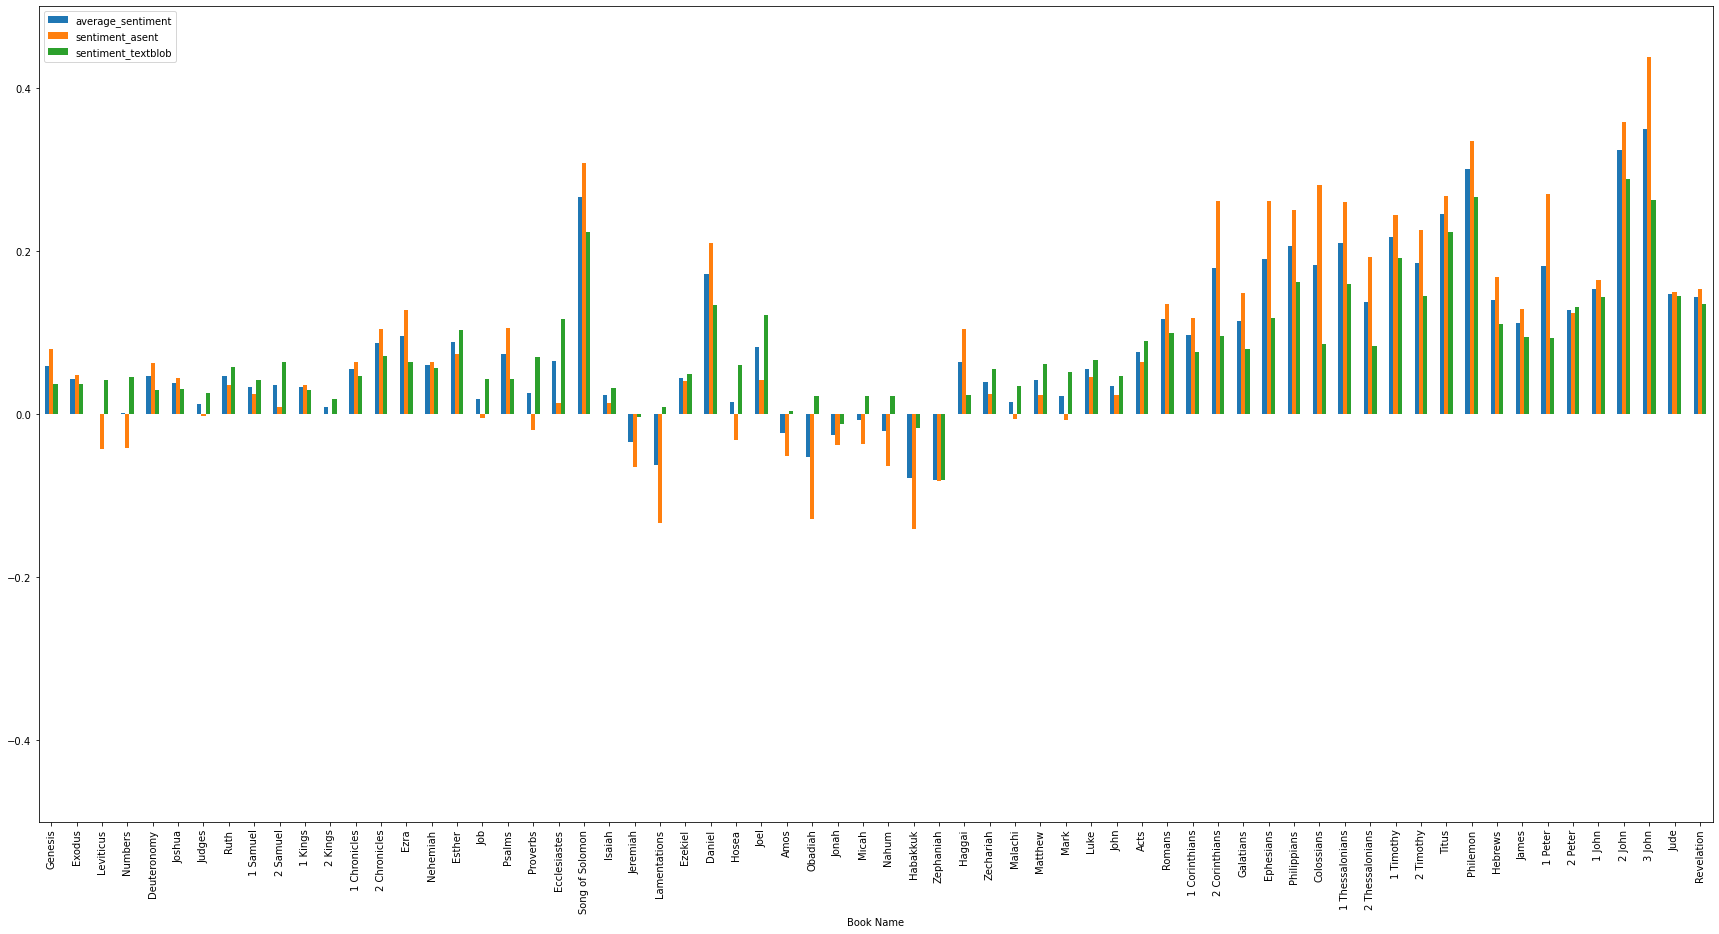

In [114]:
kjv_sent_plot = av_sent_kjv_noindex.plot(x="Book Name", y=["average_sentiment","sentiment_asent","sentiment_textblob"],ylim=(-.5,.5), kind='bar', figsize=(30,15))


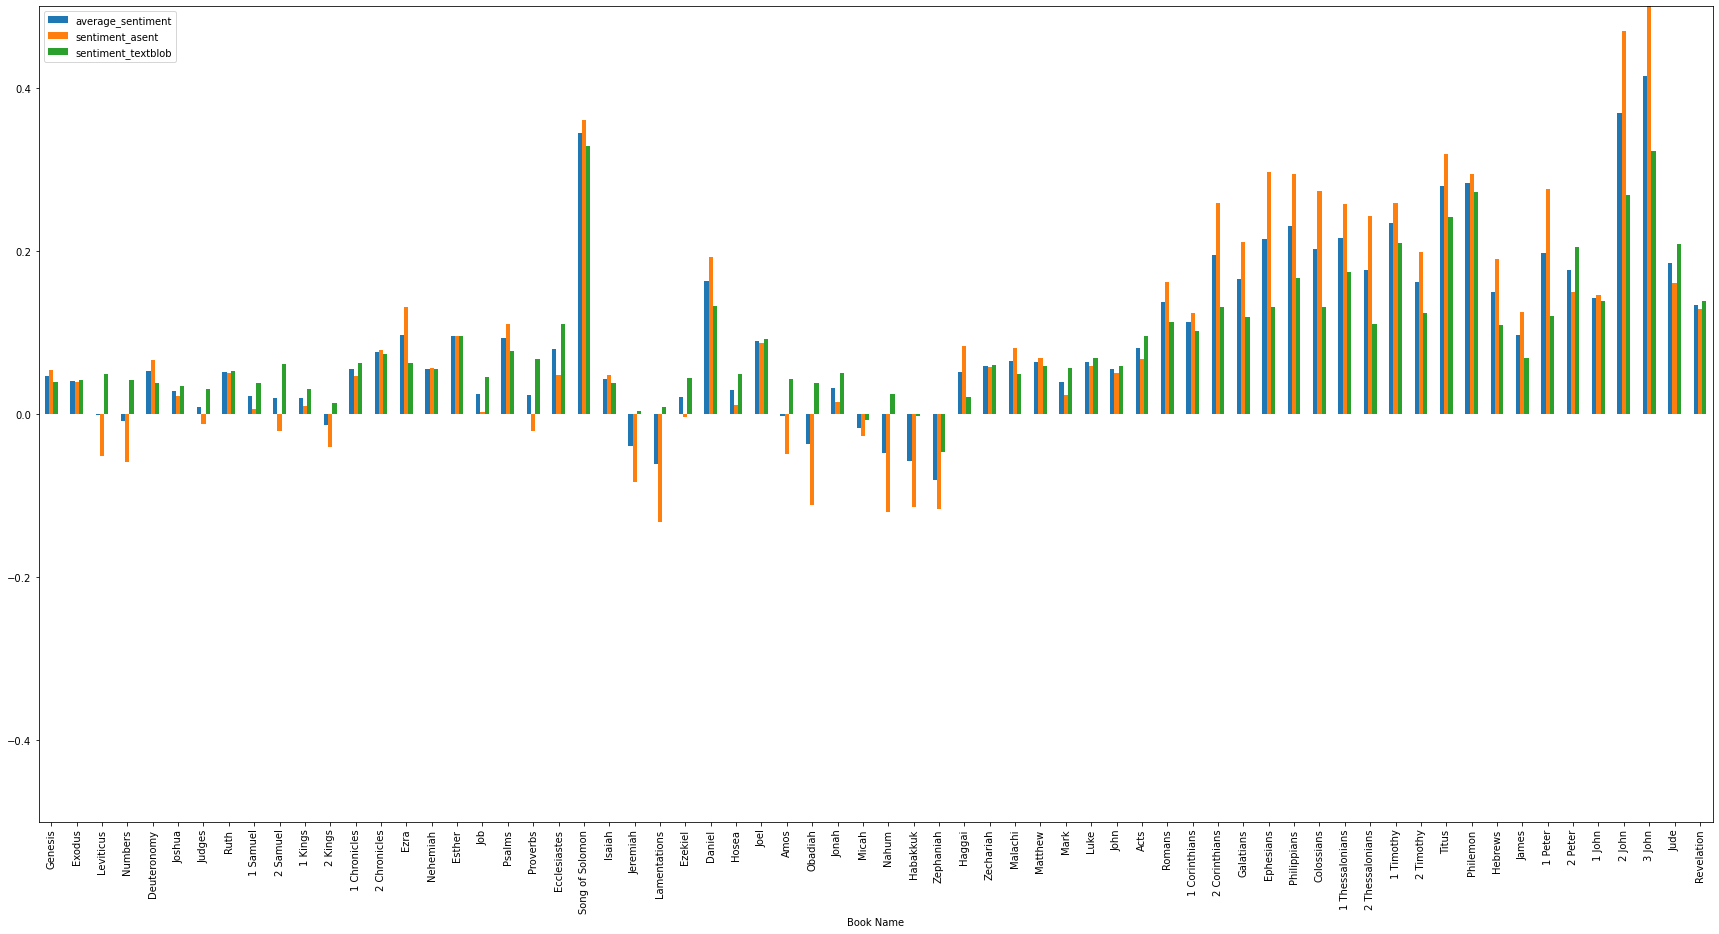

In [115]:
web_sent_plot = av_sent_web_noindex.plot(x="Book Name", y=["average_sentiment","sentiment_asent","sentiment_textblob"], kind='bar', ylim = (-.5,.5), figsize=(30,15))


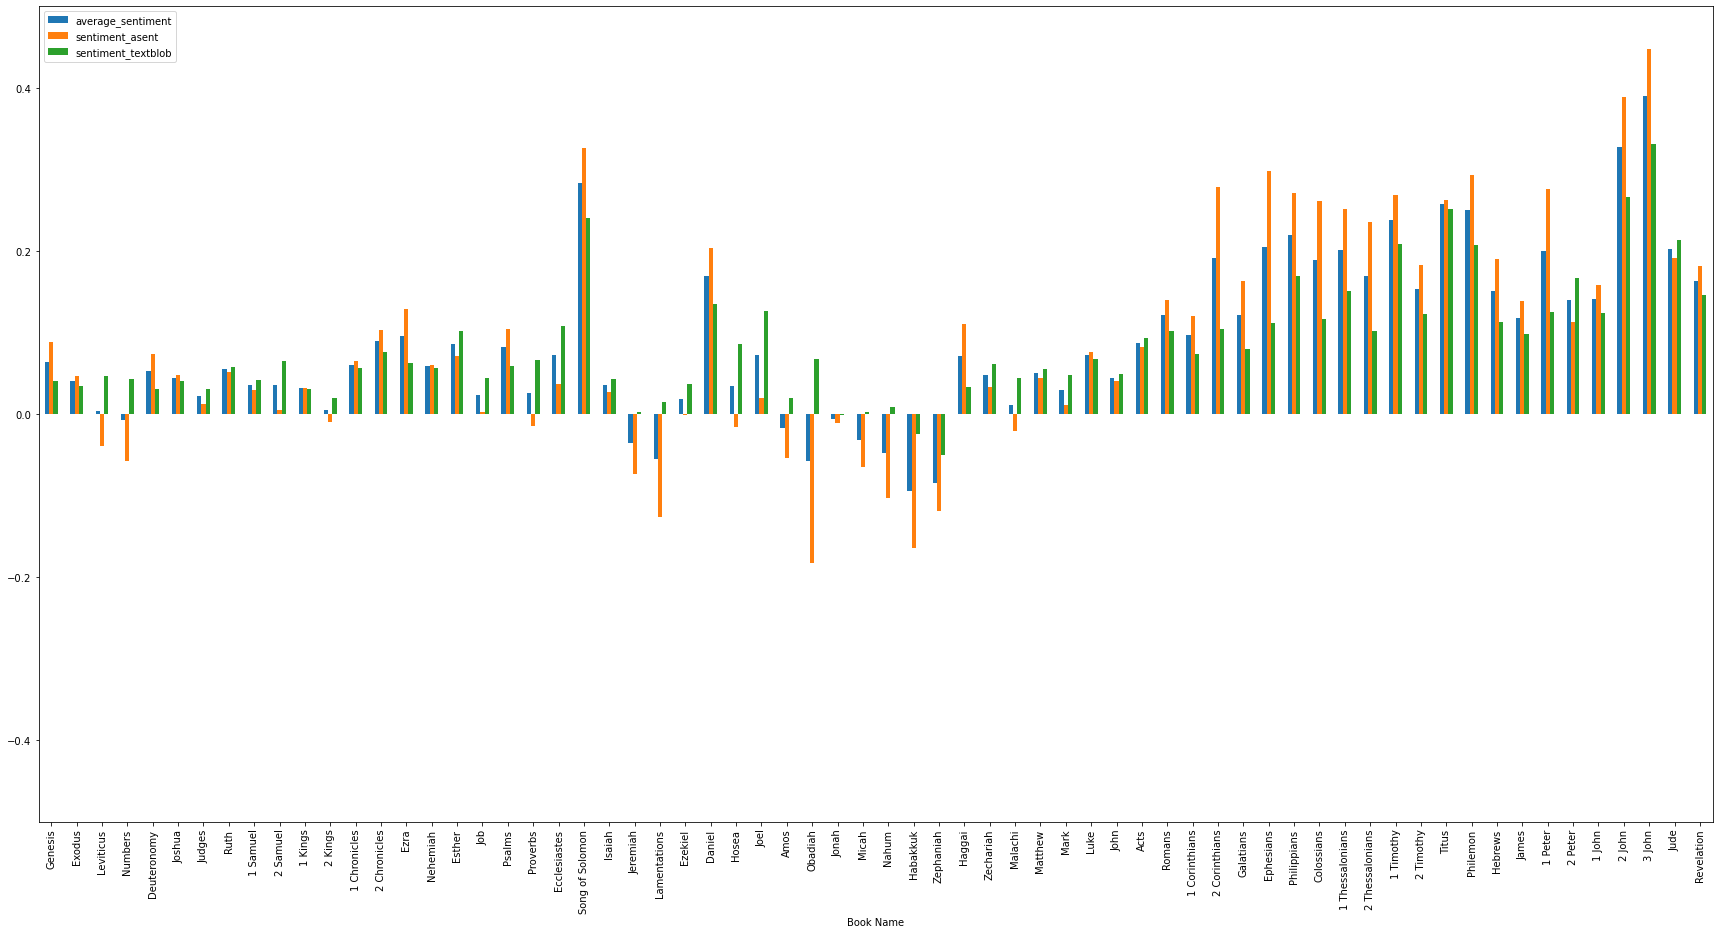

In [116]:
asv_sent_plot = av_sent_asv_noindex.plot(x="Book Name", y=["average_sentiment","sentiment_asent","sentiment_textblob"], kind = 'bar', ylim = (-.5,.5), figsize=(30,15))


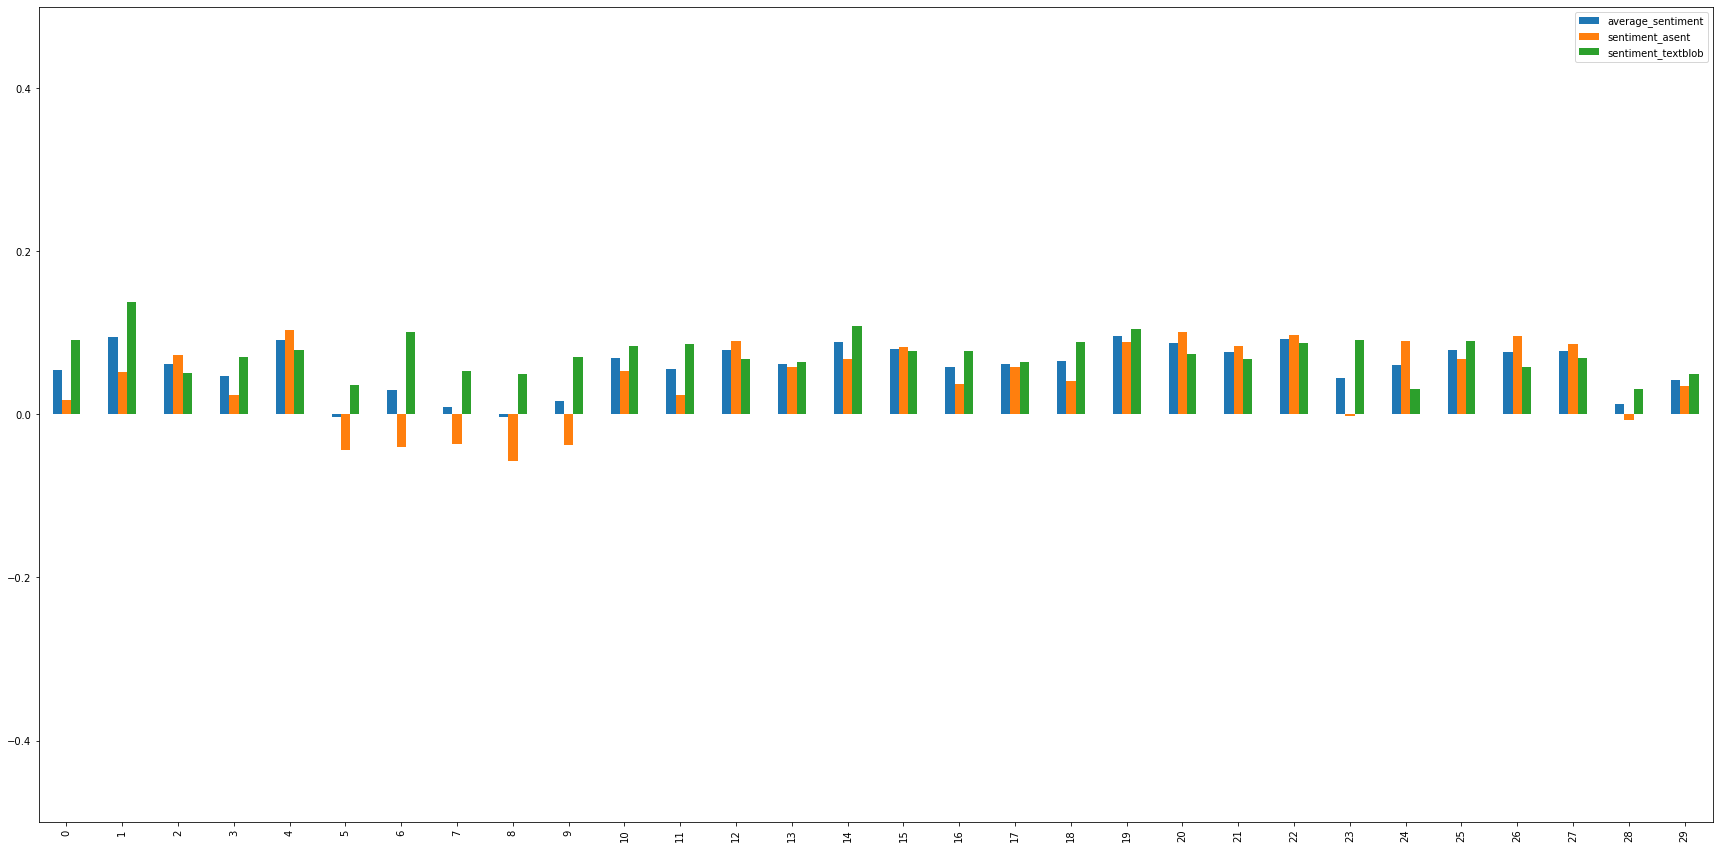

In [117]:
enq_sent_plot = av_sent_enq_noindex.plot(y=["average_sentiment","sentiment_asent","sentiment_textblob"],ylim=(-.5,.5), kind='bar', figsize=(30,15))


### Wordclouds

In [172]:
STOPWORDS.add('Jinns')

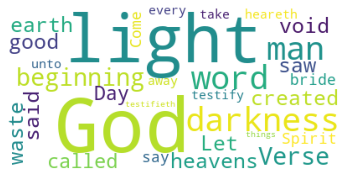

In [173]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=30,
                          max_font_size=90, 
                          random_state=0
                         ).generate(str(asv_df['Text']))

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("asv_wordcloud.png", dpi=1100)

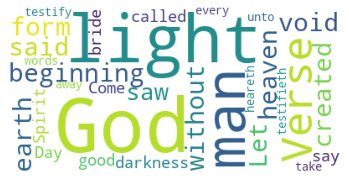

In [174]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=30,
                          max_font_size=90, 
                          random_state=0
                         ).generate(str(kjv_df['Text']))

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("kjv_wordcloud.png", dpi=1100)

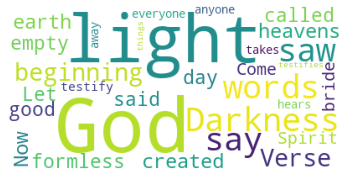

In [175]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=30,
                          max_font_size=90, 
                          random_state=0
                         ).generate(str(web_df['Text']))

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("web_wordcloud.png", dpi=1100)

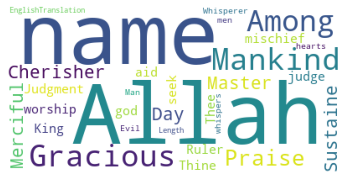

In [176]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=30,
                          max_font_size=100, 
                          random_state=1
                         ).generate(str(enq_df['EnglishTranslation']))

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("enq_wordcloud.png", dpi=1100)